# Intuition about the heat equation - Brownian Motion

## Modeling Brownian Motion

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
num_dots = 500  # Number of particles
box_size = 10
dt = 1.0 # time step
time_steps = 2000 # number of timesteps to iterate
speed = 0.05  # Speed of the particles

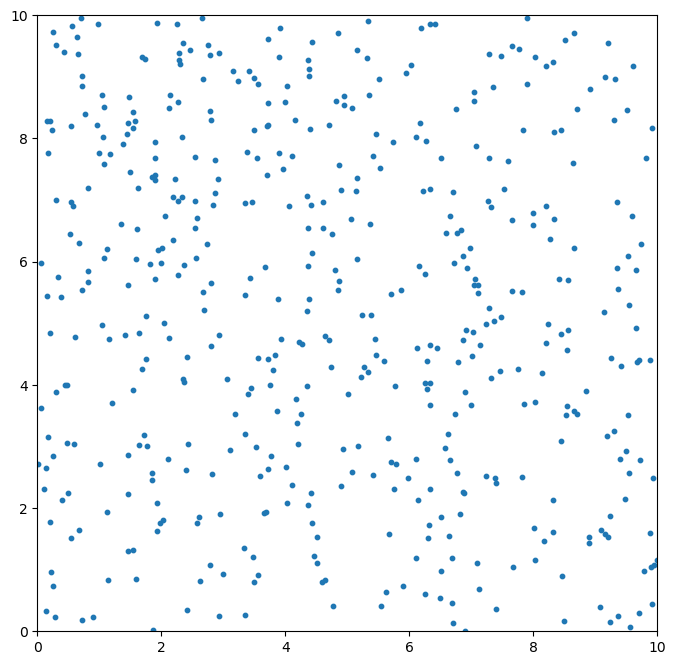

In [8]:

# Initialize positions and velocities
positions = np.random.rand(num_dots, 2) * [box_size / 2, box_size]
velocities = np.random.randn(num_dots, 2)

# Normalize velocities to have the same speed
velocities = (velocities / np.linalg.norm(velocities, axis=1)[:, np.newaxis]) * speed

def update_positions(positions, velocities, box_size, dt):
    positions += velocities * dt
    
    # Check for boundary collisions and bounce back
    for i in range(num_dots):
        for j in range(2):
            if positions[i, j] <= 0 or positions[i, j] >= box_size:
                velocities[i, j] *= -1
                positions[i, j] = np.clip(positions[i, j], 0, box_size)
    
    return positions, velocities

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
scat = ax.scatter(positions[:, 0], positions[:, 1], s=10)
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)

def animate(frame):
    global positions, velocities
    positions, velocities = update_positions(positions, velocities, box_size, dt)
    scat.set_offsets(positions)
    return scat,

ani = FuncAnimation(fig, animate, frames=time_steps, interval=10, blit=True)
writer = PillowWriter(fps=30)
ani.save("animation.gif", writer=writer)